# DS-SF-36 | Unit Project | 3 | Machine Learning Modeling and Executive Summary | Starter Code

In this project, you will perform a logistic regression on the admissions data we've been working with in Unit Project 1 and 2.  You will summarize and present your findings and the methods you used.

In [1]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

import statsmodels.formula.api as smf

from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
from IPython.display import Image
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.datasets import make_classification;

/Users/maxie/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'dataset-ucla-admissions.csv'))
df.dropna(inplace = True)

df

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


## Part A.  Frequency Table

> ### Question 1.  Create a frequency table for `prestige` and whether an applicant was admitted.

In [3]:
pd.crosstab(index=df["admit"], 
                    columns=df["prestige"])

prestige,1.0,2.0,3.0,4.0
admit,,,,
0,28,95,93,55
1,33,53,28,12


In [4]:
pd.crosstab(df.admit, df.prestige, dropna = False)

prestige,1.0,2.0,3.0,4.0
admit,,,,
0,28,95,93,55
1,33,53,28,12


## Part B.  Feature Engineering

> ### Question 2.  Create a one-hot encoding for `prestige`.

In [5]:
prestige_df = pd.get_dummies(df.prestige, prefix = 'prestige')
prestige_df

,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
395,0,1,0,0
396,0,0,1,0
397,0,1,0,0
398,0,1,0,0


In [14]:
prestige_df.rename(columns = {'prestige_1.0': 'prestige_1',
    'prestige_2.0': 'prestige_2',
    'prestige_3.0': 'prestige_3',
    'prestige_4.0': 'prestige_4'}, inplace = True)

> ### Question 3.  How many of these binary variables do we need for modeling?

Answer: we may not need all of them. Maybe can remove the 1st prestige 1 

> ### Question 4.  Why are we doing this?

Answer: we use one-hot encoding to transform categorical features to a format that works better with classification and regression algorithms.
We remove 1 variable to avoid a distinct linear combination equal to a constant vector
x′1+x′2+⋯+x′k=1
We do not want to have highly correlation variables in the dataset.

> ### Question 5.  Add all these binary variables in the dataset and remove the now redundant `prestige` feature.

In [15]:
df = df.join([prestige_df])

In [16]:
df.columns

Index([u'admit', u'gre', u'gpa', u'prestige', u'prestige_1', u'prestige_2',
       u'prestige_3', u'prestige_4'],
      dtype='object')

In [17]:
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(prestige_df.ix[:, 'prestige_2':])
print data.head()

   admit    gre   gpa  prestige_2  prestige_3  prestige_4
0      0  380.0  3.61           0           1           0
1      1  660.0  3.67           0           1           0
2      1  800.0  4.00           0           0           0
3      1  640.0  3.19           0           0           1
4      0  520.0  2.93           0           0           1


/Users/maxie/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


In [18]:
smf.ols(formula = 'admit ~ prestige_2 + prestige_3 + prestige_4', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     8.899
Date:                Mon, 21 Aug 2017   Prob (F-statistic):           1.02e-05
Time:                        05:06:38   Log-Likelihood:                -246.67
No. Observations:                 397   AIC:                             501.3
Df Residuals:                     393   BIC:                             517.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5410      0.058      9.333      0.000       0.427       0.655
prestige_2    -0.1829      0.069     -2.655      0.008      -0.318      -0.047
prestige_3    -0.3096      0.071     -4.355      0.000      -0.449      -0.170
prestige_4    -0.3619      0.080     -4.517      0.000      -0.519      -0.204
==============================================================================
Omnibus:                      218.144   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.254
Skew:                           0.725   Prob(JB):                     3.69e-13
Kurtosis:                       1.834   Cond. No.                         6.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Part C.  Hand calculating odds ratios

Let's develop our intuition about expected outcomes by hand calculating odds ratios.

> ### Question 6.  Create a frequency table for `prestige = 1` and whether an applicant was admitted.

In [19]:
pres1_df = pd.crosstab(index=df["admit"], columns=df["prestige"]==1)
pres1_df

prestige,False,True
admit,,
0,243,28
1,93,33


In [20]:
# this table is just for my further into about the data. Not the answer to the question.
df_freq = pd.crosstab(index=df["admit"], columns=df["prestige"])
df_freq

prestige,1.0,2.0,3.0,4.0
admit,,,,
0,28,95,93,55
1,33,53,28,12


> ### Question 7.  Use the frequency table above to calculate the odds of being admitted to graduate school for applicants that attended the most prestigious undergraduate schools.

In [21]:
# TODO
odds1 = float(33)/28
odds1

1.1785714285714286

> ### Question 8.  Now calculate the odds of admission for undergraduates who did not attend a #1 ranked college.

In [22]:
not1_odds = float(93)/243
not1_odds

0.38271604938271603

> ### Question 9.  Finally, what's the odds ratio?

In [23]:
odds1/not1_odds

3.079493087557604

In [24]:
# or:
most_pres_odd_ratio = ((float(33)/28))/((float(93)/243))
most_pres_odd_ratio

3.079493087557604

> ### Question 10.  Write this finding in a sentence.

Answer: 
the odds of being admitted for applicants that attended the most prestigious undergraduate schools are 3 times higher than the odds of being admitted for applicants that did not attend the most prestigious undergrad school

> ### Question 11.  Use the frequency table above to calculate the odds of being admitted to graduate school for applicants that attended the least prestigious undergraduate schools.  Then calculate their odds ratio of being admitted to UCLA.  Finally, write this finding in a sentence.

In [25]:
# uhm, i created the table again as it doesn't make sense to me for using the prestige=1 table
least_pres_df = pd.crosstab(index=df["admit"], columns=df["prestige"]==4)
least_pres_df

prestige,False,True
admit,,
0,216,55
1,114,12


In [26]:
least_pres_odd_ratio = ((float(12)/55))/((float(114)/216))
least_pres_odd_ratio

0.4133971291866028

## Part D. Analysis using `statsmodels`

> ### Question 12.  Fit a logistic regression model predicting admission into UCLA using `gre`, `gpa`, and the `prestige` of the undergraduate schools.  Use the highest prestige undergraduate schools as your reference point.

http://blog.yhat.com/posts/logistic-regression-and-python.html

#### sorry, i just copied from the above link as it seems to be the answer already.

In [27]:
import statsmodels.api as sm

train_cols = data.columns[1:]
# Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)

logit = sm.Logit(data['admit'], data[train_cols])

# fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.589121
         Iterations 5


> ### Question 13.  Print the model's summary results.

In [28]:
print result.summary()

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      392
Method:                           MLE   Df Model:                            4
Date:                Mon, 21 Aug 2017   Pseudo R-squ.:                 0.05722
Time:                        05:07:00   Log-Likelihood:                -233.88
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.039e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre            0.0014      0.001      1.308      0.191      -0.001       0.003
gpa           -0.1323      0.195     -0.680      0.497      -0.514       0.249
prestige_2    -0.9562      0.302     -3.171      0.0

> ### Question 14.  What are the odds ratios of the different features and their 95% confidence intervals?

In [29]:
print np.exp(result.params)

gre           1.001368
gpa           0.876073
prestige_2    0.384342
prestige_3    0.214918
prestige_4    0.154135
dtype: float64


In [54]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR'] #why is it 97.5% and not 95%? Though, the OR doesn't change
print np.exp(conf)

                2.5%     97.5%        OR
gre         0.999320  1.003420  1.001368
gpa         0.598303  1.282800  0.876073
prestige_2  0.212826  0.694082  0.384342
prestige_3  0.112055  0.412207  0.214918
prestige_4  0.070176  0.338540  0.154135


> ### Question 15.  Interpret the odds ratio for `prestige = 2`.

### Answer:
we can expect the odds of being admitted to decrease by about 38% if the prestige of a school is 2

> ### Question 16.  Interpret the odds ratio of `gpa`.

Answer: we can expect the odds of being admitted to decrease by about 0.87 for each gpa unit decreased

> ### Question 17.  Assuming a student with a GRE of 800 and a GPA of 4.  What is his/her probability of admission  if he/she come from a tier-1, tier-2, tier-3, or tier-4 undergraduate school?

In [73]:
gre800 = (data['gre']== 800)
gre800

gpa4 = (data['gpa']== 4)
gpa4

combos = pd.DataFrame(cartesian([gre800, gpa4, [1, 2, 3, 4], [1.]]))
combos


,0,1,2,3
0,False,False,True,True
1,False,False,True,True
2,False,False,True,True
3,False,False,True,True
4,False,False,True,True
...,...,...,...,...
630431,False,False,True,True
630432,False,False,True,True
630433,False,False,True,True
630434,False,False,True,True


In [71]:
# recreate the dummy variables
combos.columns = ['gre', 'gpa', 'prestige', 'intercept']
dummy_ranks = pd.get_dummies(combos['prestige'], prefix='prestige')
dummy_ranks.columns = ['prestige_1', 'prestige_2', 'prestige_3', 'prestige_4']

# keep only what we need for making predictions
cols_to_keep = ['gre', 'gpa', 'prestige', 'intercept']
combos = combos[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])

# make predictions on the enumerated dataset
combos['admit_pred'] = result.predict(combos[train_cols])


ValueError: Length mismatch: Expected axis has 1 elements, new values have 4 elements

Answer: TODO

## Part E. Moving the model from `statsmodels` to `sklearn`

> ### Question 18.  Let's assume we are satisfied with our model.  Remodel it (same features) using `sklearn`.  When creating the logistic regression model with `LogisticRegression(C = 10 ** 2)`.

In [56]:
#Create X and y variables
X = df.drop("admit", axis=1)
y = df.admit

#Intialize, fit, and score the model
lr = LogisticRegression()

lr.fit(X,y)

score = lr.score(X,y)

print ("The model produces an accuracy score of {:.2f} percent".format(score*100))

#Intialize the logistic regression model
logr = LogisticRegression()
logr.fit(X,y);

The model produces an accuracy score of 70.78 percent


In [57]:
#Find the null accuracy aka the benchmark score
y.value_counts(normalize=True)

0    0.68262
1    0.31738
Name: admit, dtype: float64

> ### Question 19.  What are the odds ratios for the different variables and how do they compare with the odds ratios calculated with `statsmodels`?

Answer: TODO

> ### Question 20.  Again, assuming a student with a GRE of 800 and a GPA of 4.  What is his/her probability of admission  if he/she come from a tier-1, tier-2, tier-3, or tier-4 undergraduate school?

In [47]:
# TODO
V = df[["gre","gpa"]]
y = df.admit
lr_V = LogisticRegression()
lr_V.fit(V, y);

In [48]:
gre_value = 800
gpa_value = 4
logodds = lr_V.intercept_ + lr_V.coef_[0]*gre_value*gpa_value
logodds

array([  4.6379094 ,  54.72175053])

In [49]:
# convert log-odds to odds
odds = np.exp(logodds)
odds

array([  1.03328104e+02,   5.82578287e+23])

In [52]:
# convert odds to probability. 
prob = odds/(1 + odds)
prob

array([ 0.99041486,  1.        ])

Answer: I don't know how to display it from each tier. I tried with groupy but it didn't work. Please help.

## Part F.  Executive Summary

> ## Question 21.  Introduction
>
> Write a problem statement for this project.

Answer:
How does the gre, gpa and prestige rank affect the probability that the student will get admit?

> ## Question 22.  Dataset
>
> Write up a description of your data and any cleaning that was completed.

Answer:
    Drop missing data
    Plot data with box & drop outliers
    Plot data with histogram to find out if the data is normally distributed
    Distribute corretion summary table to find out the correction acorss variables

> ## Question 23.  Demo
>
> Provide a table that explains the data by admission status.

> ## Question 24.  Methods
>
> Write up the methods used in your analysis.

Answer: 
Logistic regression with statsmode and sklearn

> ## Question 25.  Results
>
> Write up your results.

Answer:
The probability of admission gradually increases as gre and gpa increase and that the different prestige levels yield drastic probabilities of admission (particularly the most/least prestigious schools).

> ## Question 26.  Visuals
>
> Provide a table or visualization of these results.

In [56]:
def cartesian(arrays, out=None):
    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [57]:
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)

gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)


/Users/maxie/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  # This is added back by InteractiveShellApp.init_path()
/Users/maxie/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


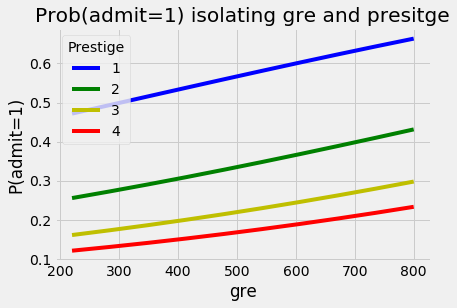

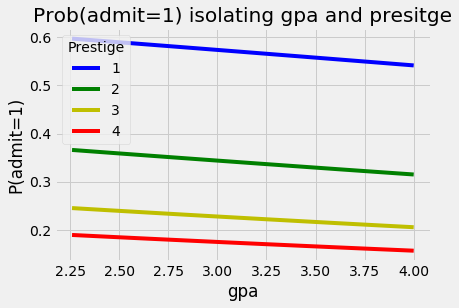

In [46]:
import pylab as pl

combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))
# recreate the dummy variables
combos.columns = ['gre', 'gpa', 'prestige', 'intercept']
dummy_ranks = pd.get_dummies(combos['prestige'], prefix='prestige')
dummy_ranks.columns = ['prestige_1', 'prestige_2', 'prestige_3', 'prestige_4']

# keep only what we need for making predictions
cols_to_keep = ['gre', 'gpa', 'prestige', 'intercept']
combos = combos[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])

# make predictions on the enumerated dataset
combos['admit_pred'] = result.predict(combos[train_cols])


def isolate_and_plot(variable):
    # isolate gre and class rank
    grouped = pd.pivot_table(combos, values=['admit_pred'], index=[variable, 'prestige'],
                            aggfunc=np.mean)

    colors = 'rbgyrbgy'
    for col in combos.prestige.unique():
        plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
        pl.plot(plt_data.index.get_level_values(0), plt_data['admit_pred'],
                color=colors[int(col)])

    pl.xlabel(variable)
    pl.ylabel("P(admit=1)")
    pl.legend(['1', '2', '3', '4'], loc='upper left', title='Prestige')
    pl.title("Prob(admit=1) isolating " + variable + " and presitge")
    pl.show()

isolate_and_plot('gre')
isolate_and_plot('gpa')

> ## Question 27.  Discussion
>
> Write up your discussion and future steps.

Answer: TODO